# Banking Customer Churn - Comprehensive Data Exploration

This notebook provides a complete exploratory data analysis of the Banking Customer Churn dataset.

## 1. Import Libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
%matplotlib inline

## 2. Load Dataset

In [24]:
# Load the dataset with correct path (one directory up from notebooks/)
df = pd.read_csv('../data/raw/Churn_Modelling.csv')
print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")

Dataset loaded successfully!
Shape: (10000, 14)


## 3. Initial Data Understanding

In [25]:
# Display first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [26]:
# Display last few rows
print("Last 5 rows of the dataset:")
df.tail()

Last 5 rows of the dataset:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [27]:
# Dataset information
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  str    
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  str    
 5   Gender           10000 non-null  str    
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), str(3)
memory usage: 1.1 MB


In [28]:
# Statistical summary
print("Statistical Summary:")
df.describe()

Statistical Summary:


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [29]:
# Check for missing values
print("Missing values per column:")
missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "No missing values found!")

Missing values per column:
No missing values found!


In [30]:
# Check for duplicate records
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


## 4. Target Variable Analysis (Exited - Churn)

In [31]:
# Churn distribution
print("Churn Distribution:")
churn_counts = df['Exited'].value_counts()
churn_pct = df['Exited'].value_counts(normalize=True) * 100

print(f"\nNon-Churned (0): {churn_counts[0]} ({churn_pct[0]:.2f}%)")
print(f"Churned (1): {churn_counts[1]} ({churn_pct[1]:.2f}%)")
print(f"\nChurn Rate: {churn_pct[1]:.2f}%")

Churn Distribution:

Non-Churned (0): 7963 (79.63%)
Churned (1): 2037 (20.37%)

Churn Rate: 20.37%


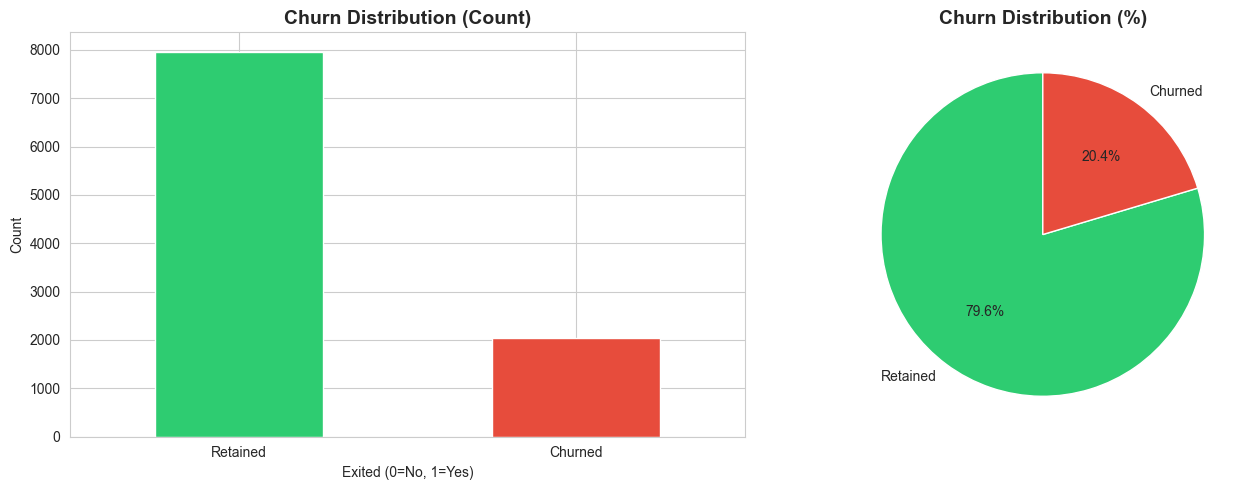

In [32]:
# Visualize churn distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
churn_counts.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Churn Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Exited (0=No, 1=Yes)')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['Retained', 'Churned'], rotation=0)

# Pie chart
axes[1].pie(churn_counts, labels=['Retained', 'Churned'], autopct='%1.1f%%', 
            colors=['#2ecc71', '#e74c3c'], startangle=90)
axes[1].set_title('Churn Distribution (%)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 5. Numerical Features Analysis

In [33]:
# Identify numerical features
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
print(f"Numerical features: {numerical_features}")

Numerical features: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']


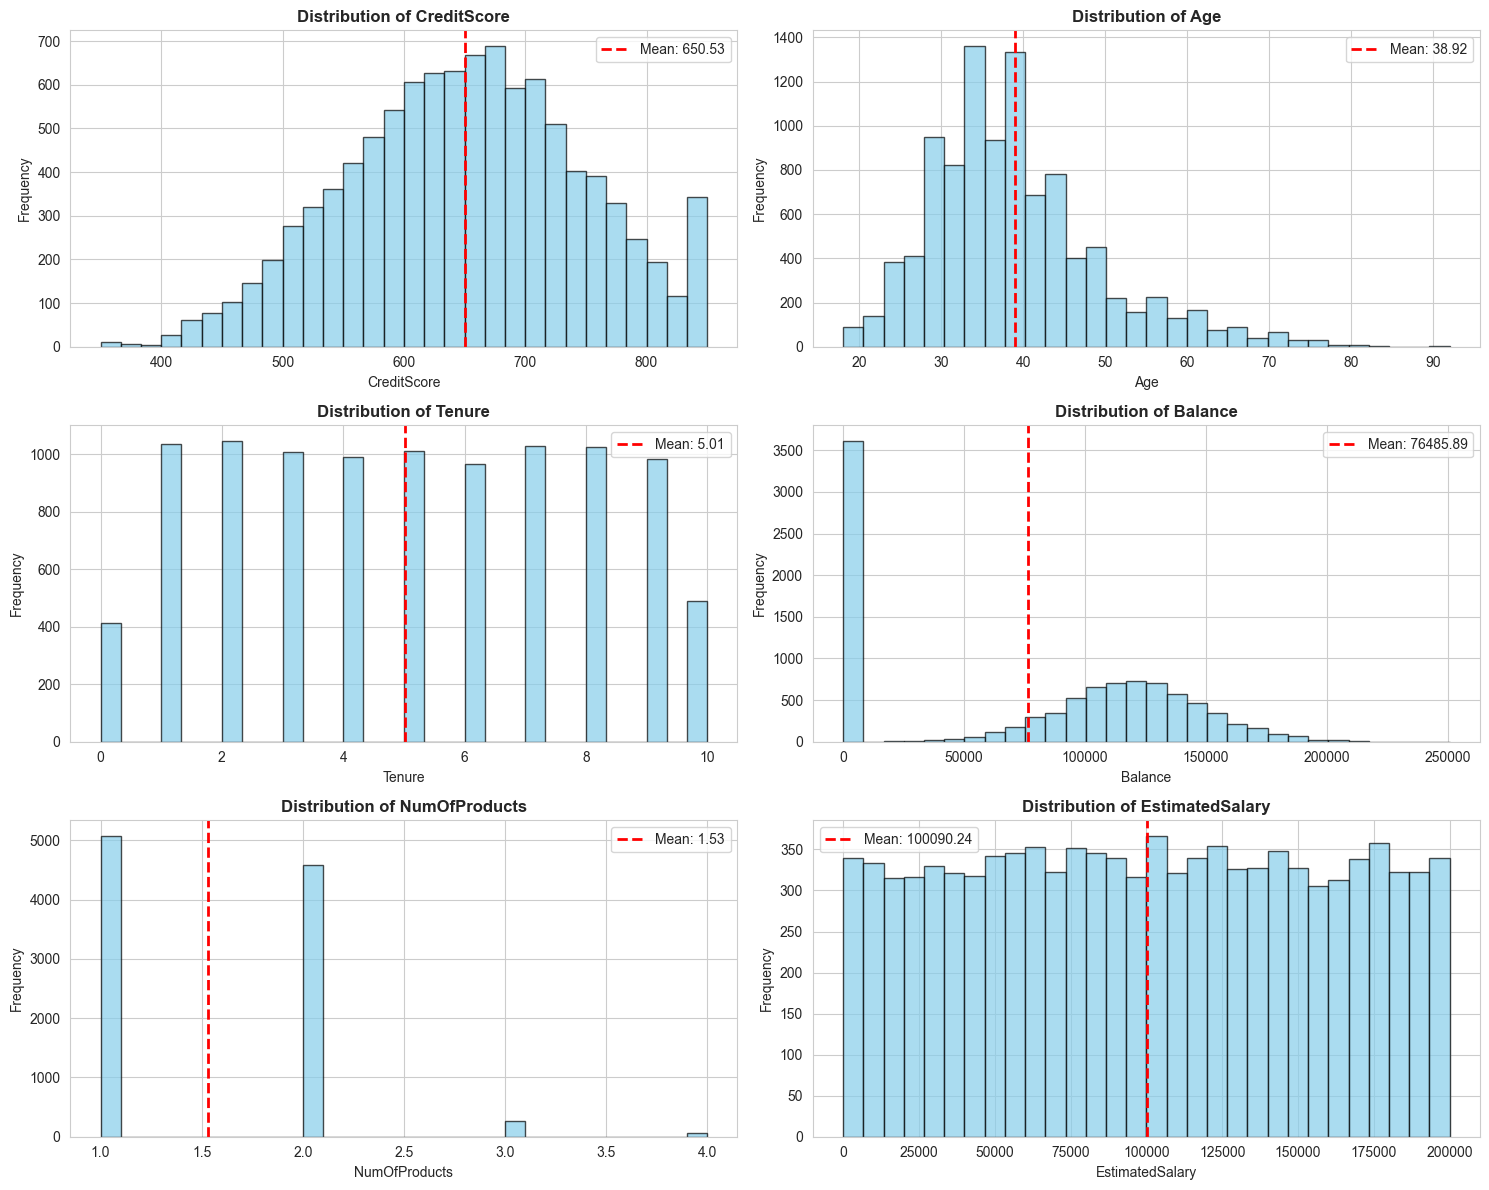

In [34]:
# Distribution plots for numerical features
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numerical_features):
    axes[idx].hist(df[col], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].axvline(df[col].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df[col].mean():.2f}')
    axes[idx].legend()

plt.tight_layout()
plt.show()

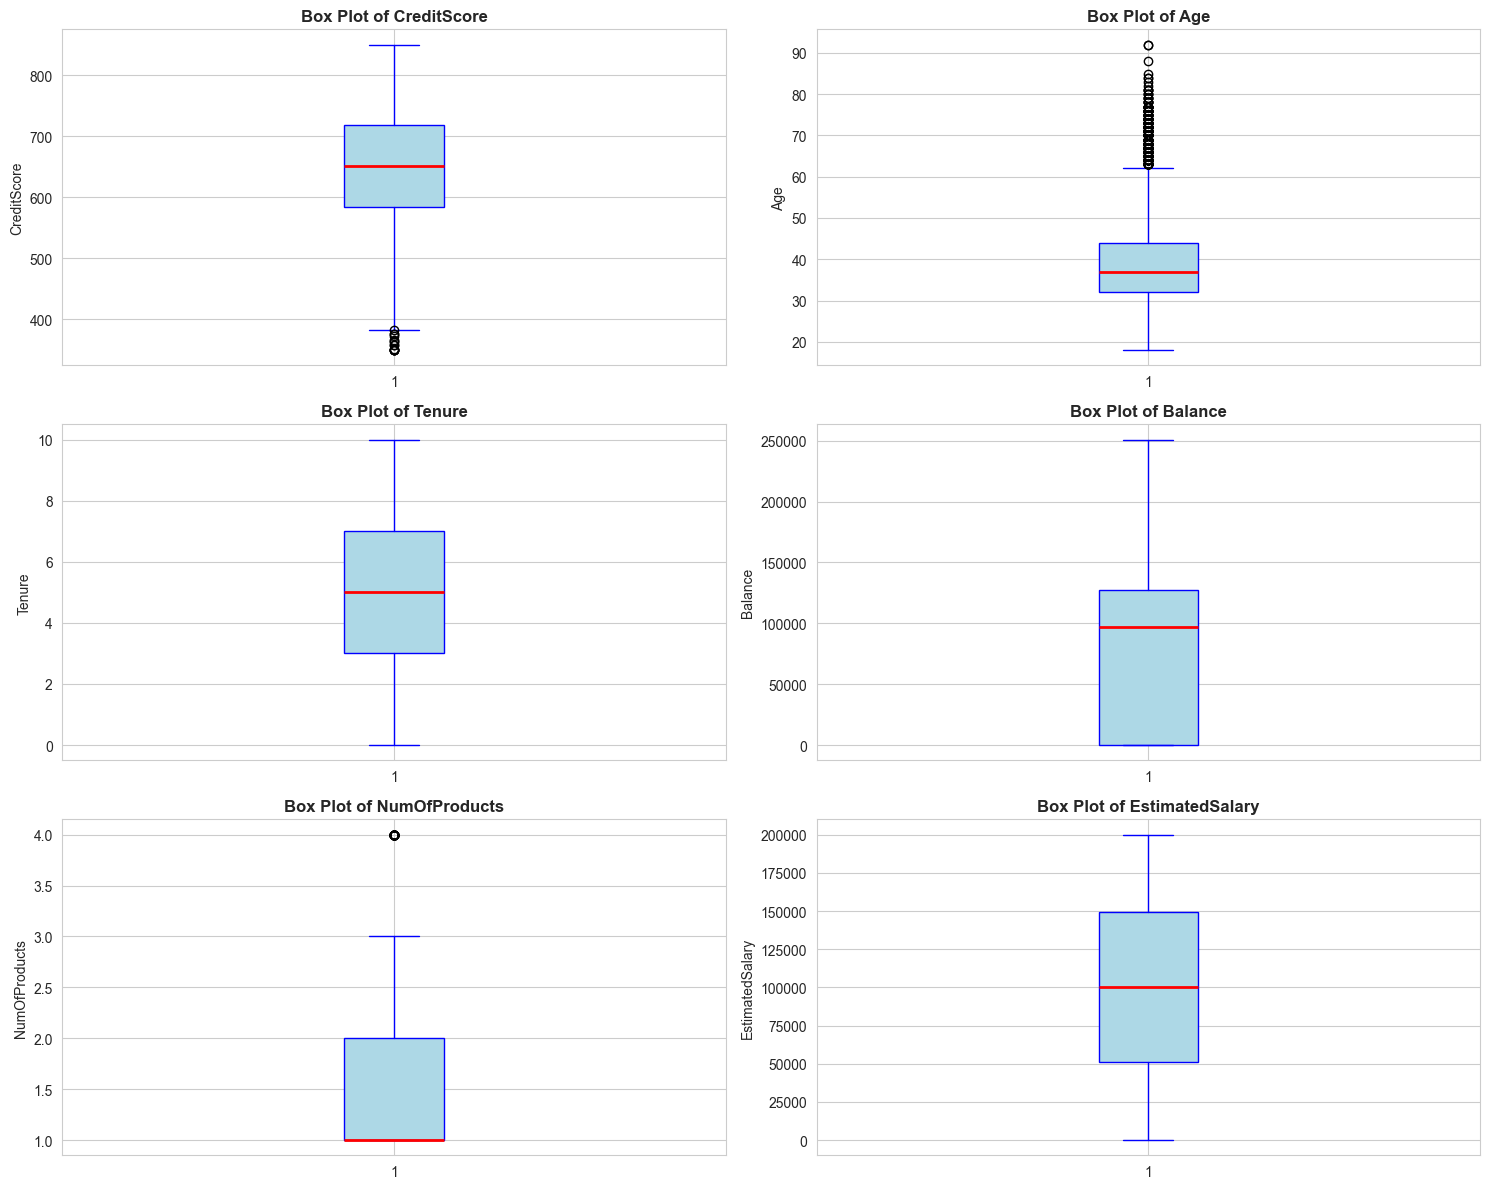

In [37]:
# Box plots to detect outliers
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numerical_features):
    axes[idx].boxplot(df[col], vert=True, patch_artist=True,
                     boxprops=dict(facecolor='lightblue', color='blue'),
                     whiskerprops=dict(color='blue'),
                     capprops=dict(color='blue'),
                     medianprops=dict(color='red', linewidth=2))
    axes[idx].set_title(f'Box Plot of {col}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(col)

plt.tight_layout()
plt.show()

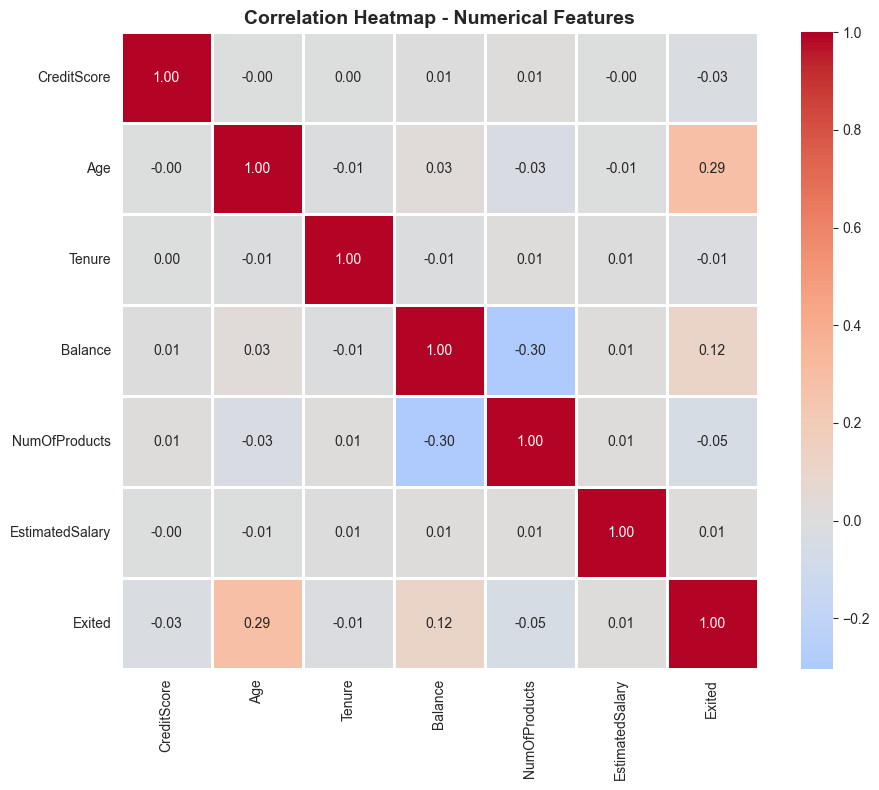

In [38]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features + ['Exited']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, fmt='.2f')
plt.title('Correlation Heatmap - Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 6. Categorical Features Analysis

In [39]:
# Identify categorical features
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
print(f"Categorical features: {categorical_features}")

Categorical features: ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']


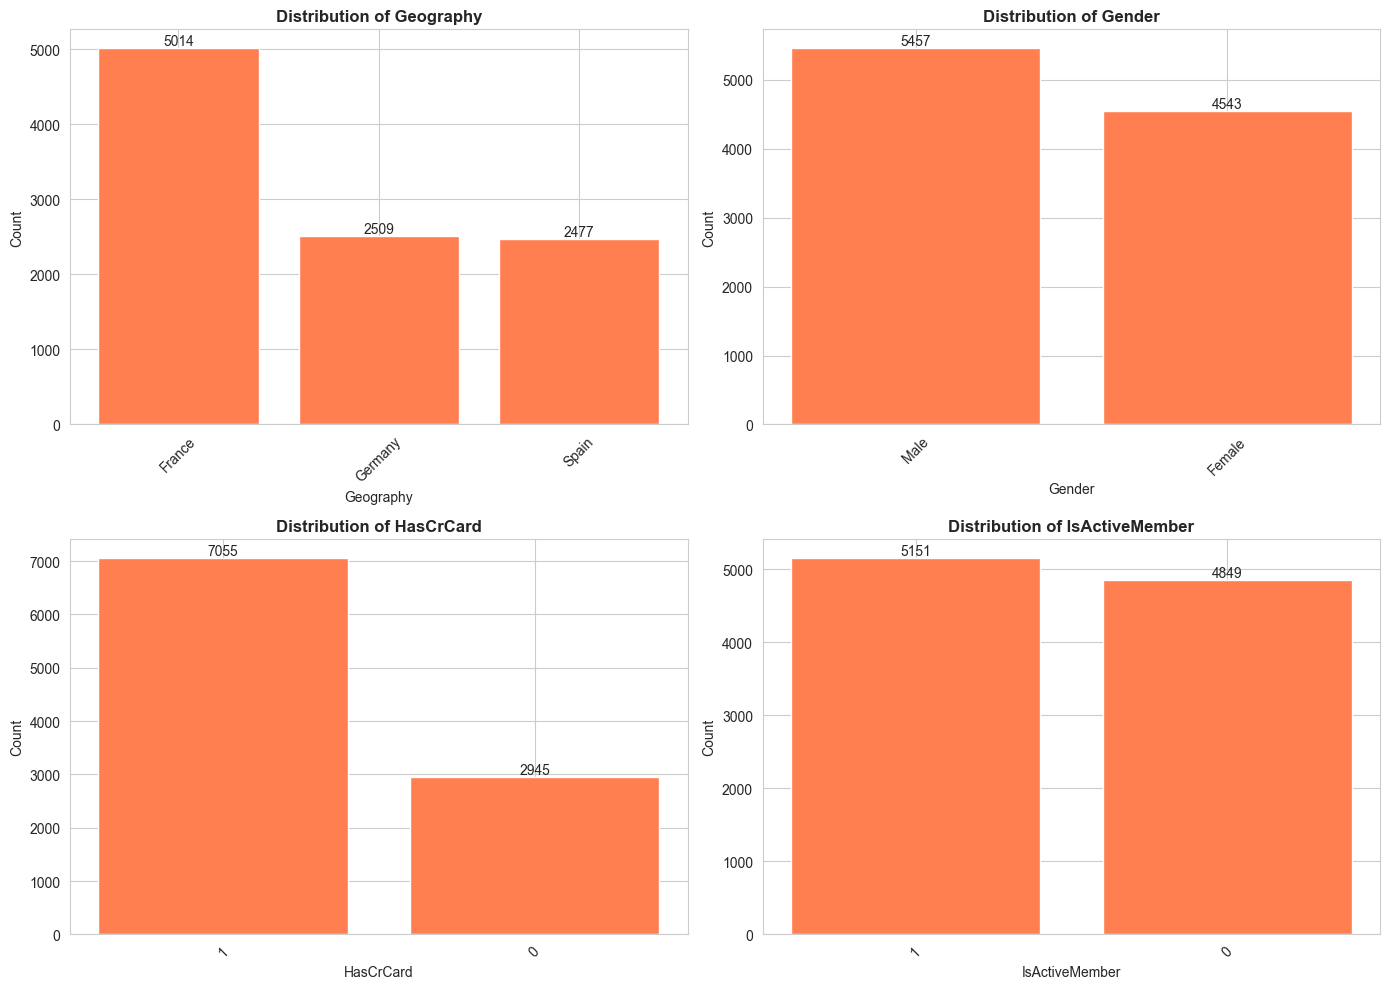

In [40]:
# Distribution of categorical features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, col in enumerate(categorical_features):
    value_counts = df[col].value_counts()
    axes[idx].bar(range(len(value_counts)), value_counts.values, color='coral')
    axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')
    axes[idx].set_xticks(range(len(value_counts)))
    axes[idx].set_xticklabels(value_counts.index, rotation=45)
    
    # Add value labels on bars
    for i, v in enumerate(value_counts.values):
        axes[idx].text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [41]:
# Cross-tabulation with churn
print("Cross-tabulation of Categorical Features with Churn:\n")

for col in categorical_features:
    print(f"\n{col}:")
    crosstab = pd.crosstab(df[col], df['Exited'], margins=True, normalize='index') * 100
    print(crosstab.round(2))
    print("-" * 50)

Cross-tabulation of Categorical Features with Churn:


Geography:
Exited         0      1
Geography              
France     83.85  16.15
Germany    67.56  32.44
Spain      83.33  16.67
All        79.63  20.37
--------------------------------------------------

Gender:
Exited      0      1
Gender              
Female  74.93  25.07
Male    83.54  16.46
All     79.63  20.37
--------------------------------------------------

HasCrCard:
Exited         0      1
HasCrCard              
0          79.19  20.81
1          79.82  20.18
All        79.63  20.37
--------------------------------------------------

IsActiveMember:
Exited              0      1
IsActiveMember              
0               73.15  26.85
1               85.73  14.27
All             79.63  20.37
--------------------------------------------------


## 7. Bivariate Analysis - Features vs Churn

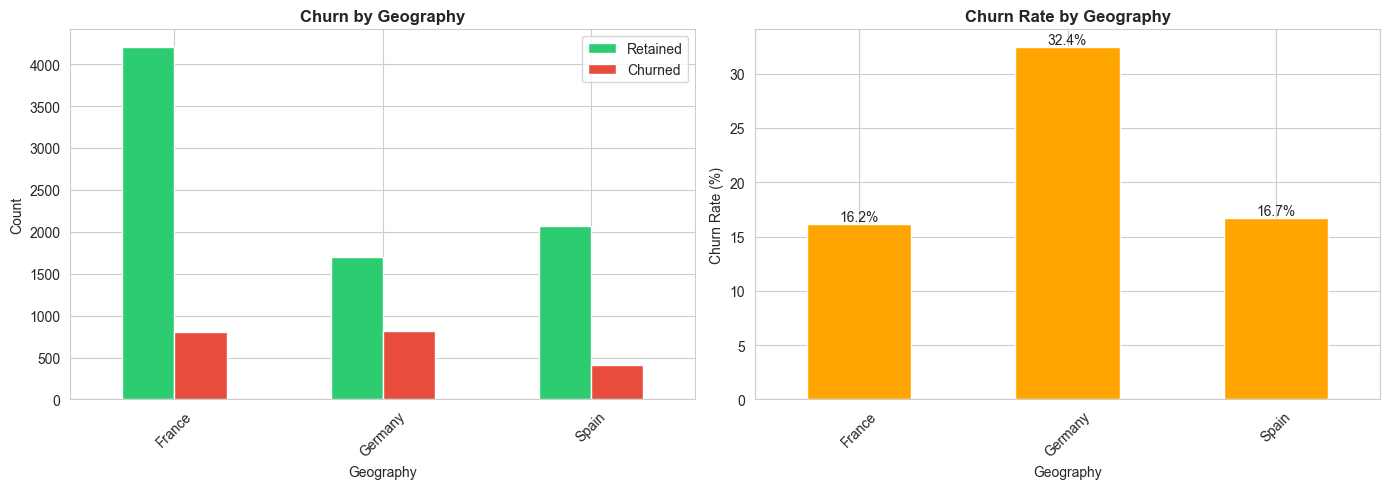

In [43]:
# Churn rate by Geography
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
df.groupby(['Geography', 'Exited']).size().unstack().plot(kind='bar', ax=axes[0], 
                                                           color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Churn by Geography', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Geography')
axes[0].set_ylabel('Count')
axes[0].legend(['Retained', 'Churned'])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Churn rate
churn_by_geo = df.groupby('Geography')['Exited'].mean() * 100
churn_by_geo.plot(kind='bar', ax=axes[1], color='orange')
axes[1].set_title('Churn Rate by Geography', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Geography')
axes[1].set_ylabel('Churn Rate (%)')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

for i, v in enumerate(churn_by_geo.values):
    axes[1].text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

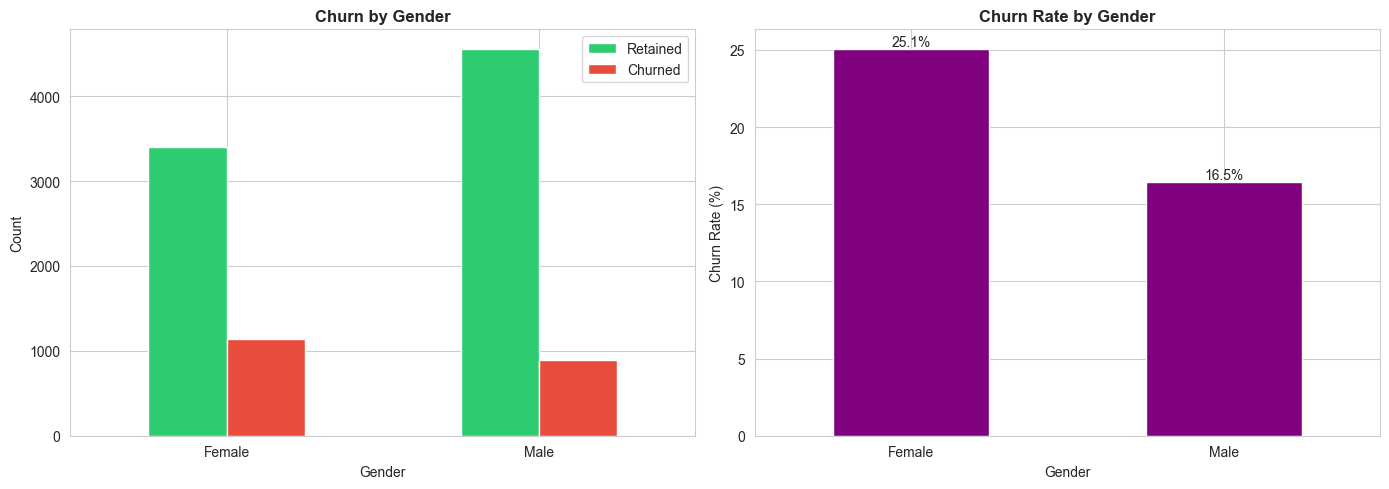

In [44]:
# Churn rate by Gender
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
df.groupby(['Gender', 'Exited']).size().unstack().plot(kind='bar', ax=axes[0], 
                                                        color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Churn by Gender', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')
axes[0].legend(['Retained', 'Churned'])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# Churn rate
churn_by_gender = df.groupby('Gender')['Exited'].mean() * 100
churn_by_gender.plot(kind='bar', ax=axes[1], color='purple')
axes[1].set_title('Churn Rate by Gender', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Churn Rate (%)')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

for i, v in enumerate(churn_by_gender.values):
    axes[1].text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

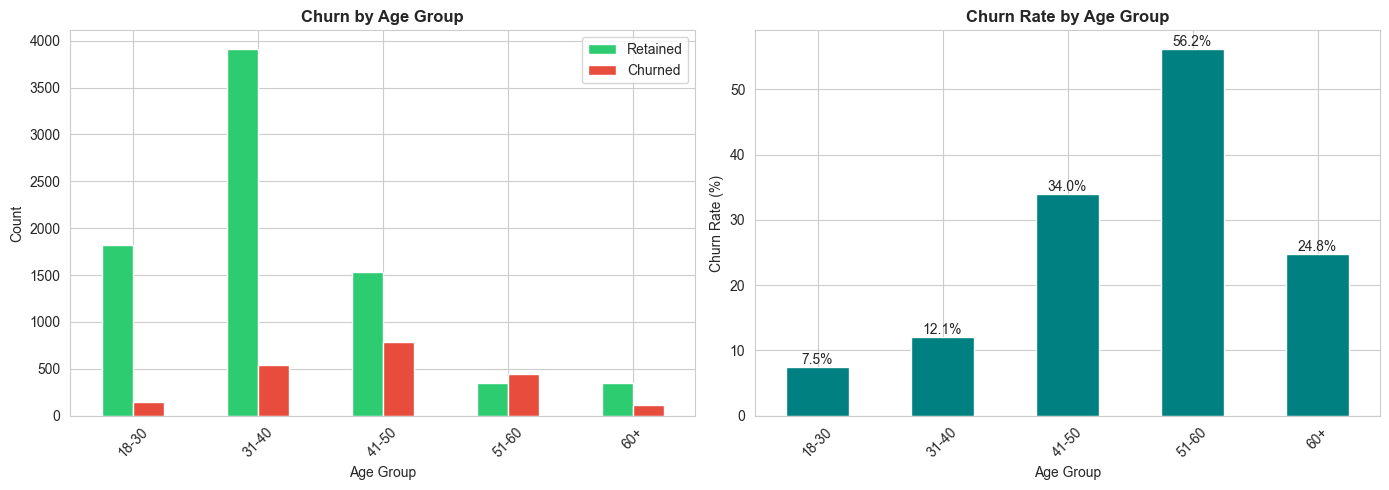

In [45]:
# Churn by Age Groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, 100], 
                        labels=['18-30', '31-40', '41-50', '51-60', '60+'])

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
df.groupby(['AgeGroup', 'Exited']).size().unstack().plot(kind='bar', ax=axes[0], 
                                                          color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Churn by Age Group', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Count')
axes[0].legend(['Retained', 'Churned'])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Churn rate
churn_by_age = df.groupby('AgeGroup')['Exited'].mean() * 100
churn_by_age.plot(kind='bar', ax=axes[1], color='teal')
axes[1].set_title('Churn Rate by Age Group', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Churn Rate (%)')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

for i, v in enumerate(churn_by_age.values):
    axes[1].text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

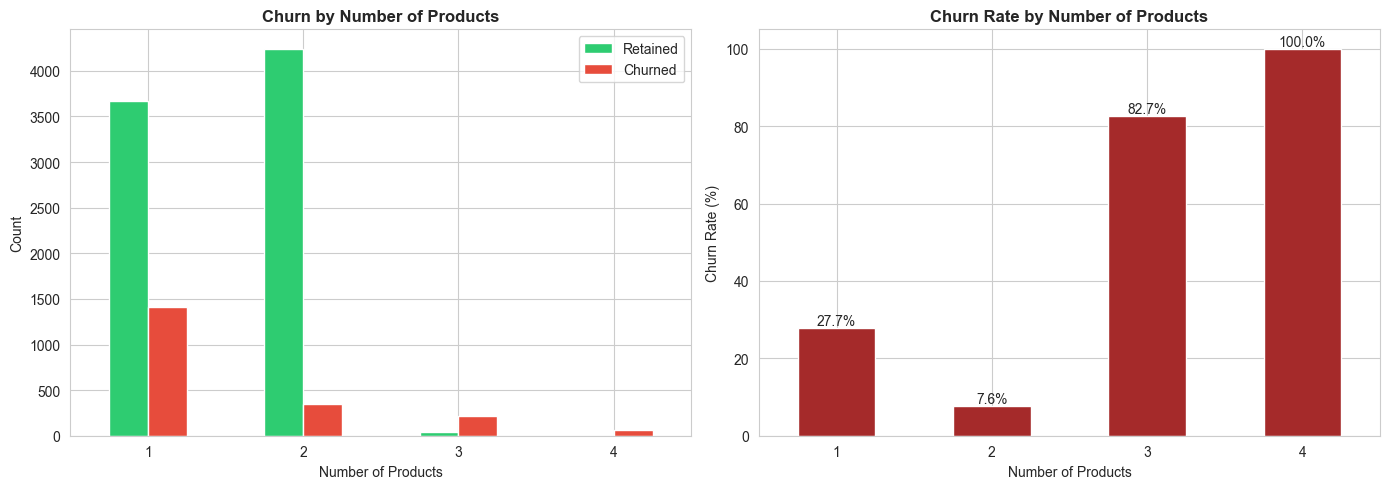

In [46]:
# Churn rate by Number of Products
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
df.groupby(['NumOfProducts', 'Exited']).size().unstack().plot(kind='bar', ax=axes[0], 
                                                               color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Churn by Number of Products', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Number of Products')
axes[0].set_ylabel('Count')
axes[0].legend(['Retained', 'Churned'])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# Churn rate
churn_by_products = df.groupby('NumOfProducts')['Exited'].mean() * 100
churn_by_products.plot(kind='bar', ax=axes[1], color='brown')
axes[1].set_title('Churn Rate by Number of Products', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Number of Products')
axes[1].set_ylabel('Churn Rate (%)')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

for i, v in enumerate(churn_by_products.values):
    axes[1].text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

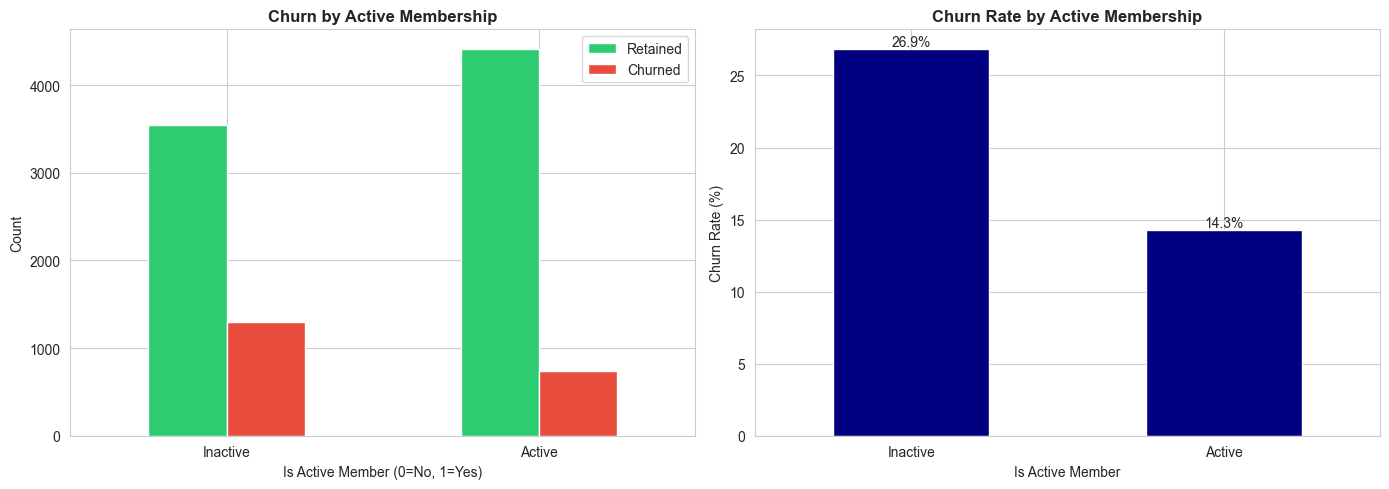

In [47]:
# Churn rate by Active Membership
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
df.groupby(['IsActiveMember', 'Exited']).size().unstack().plot(kind='bar', ax=axes[0], 
                                                                color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Churn by Active Membership', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Is Active Member (0=No, 1=Yes)')
axes[0].set_ylabel('Count')
axes[0].legend(['Retained', 'Churned'])
axes[0].set_xticklabels(['Inactive', 'Active'], rotation=0)

# Churn rate
churn_by_active = df.groupby('IsActiveMember')['Exited'].mean() * 100
churn_by_active.plot(kind='bar', ax=axes[1], color='navy')
axes[1].set_title('Churn Rate by Active Membership', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Is Active Member')
axes[1].set_ylabel('Churn Rate (%)')
axes[1].set_xticklabels(['Inactive', 'Active'], rotation=0)

for i, v in enumerate(churn_by_active.values):
    axes[1].text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

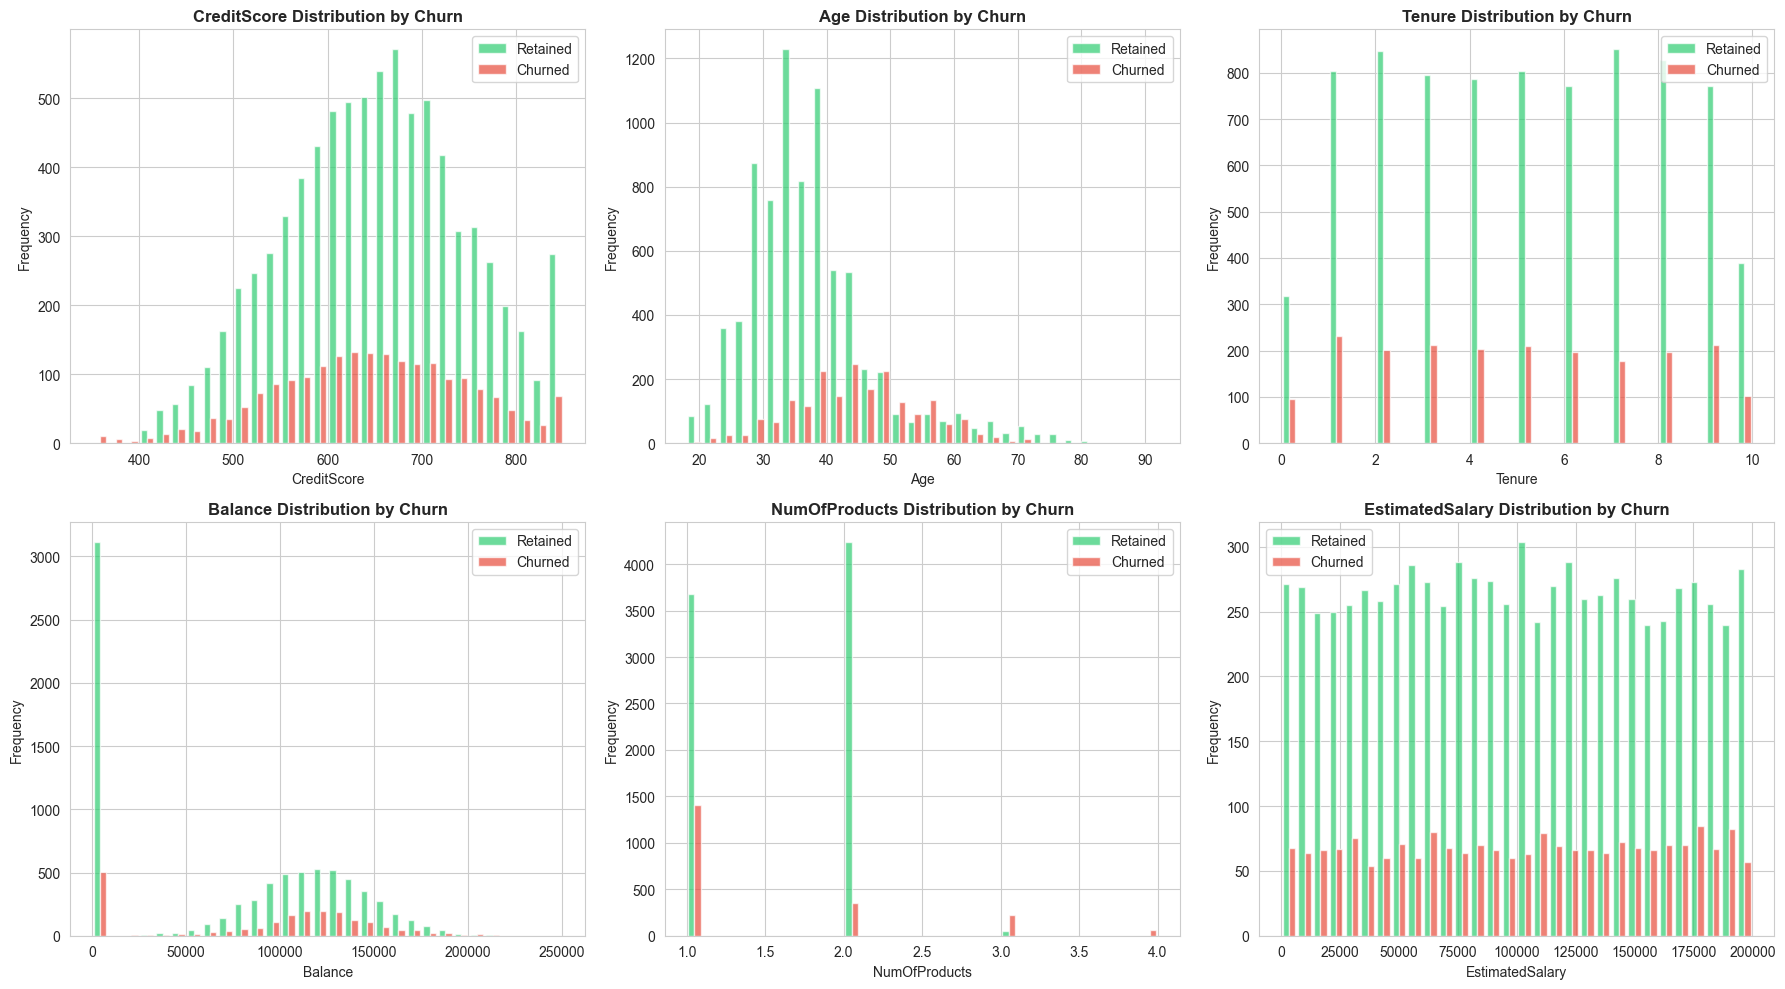

In [48]:
# Comparison of numerical features between churned and retained customers
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_features):
    retained = df[df['Exited'] == 0][col]
    churned = df[df['Exited'] == 1][col]
    
    axes[idx].hist([retained, churned], bins=30, label=['Retained', 'Churned'], 
                   color=['#2ecc71', '#e74c3c'], alpha=0.7)
    axes[idx].set_title(f'{col} Distribution by Churn', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].legend()

plt.tight_layout()
plt.show()

## 8. Multivariate Analysis

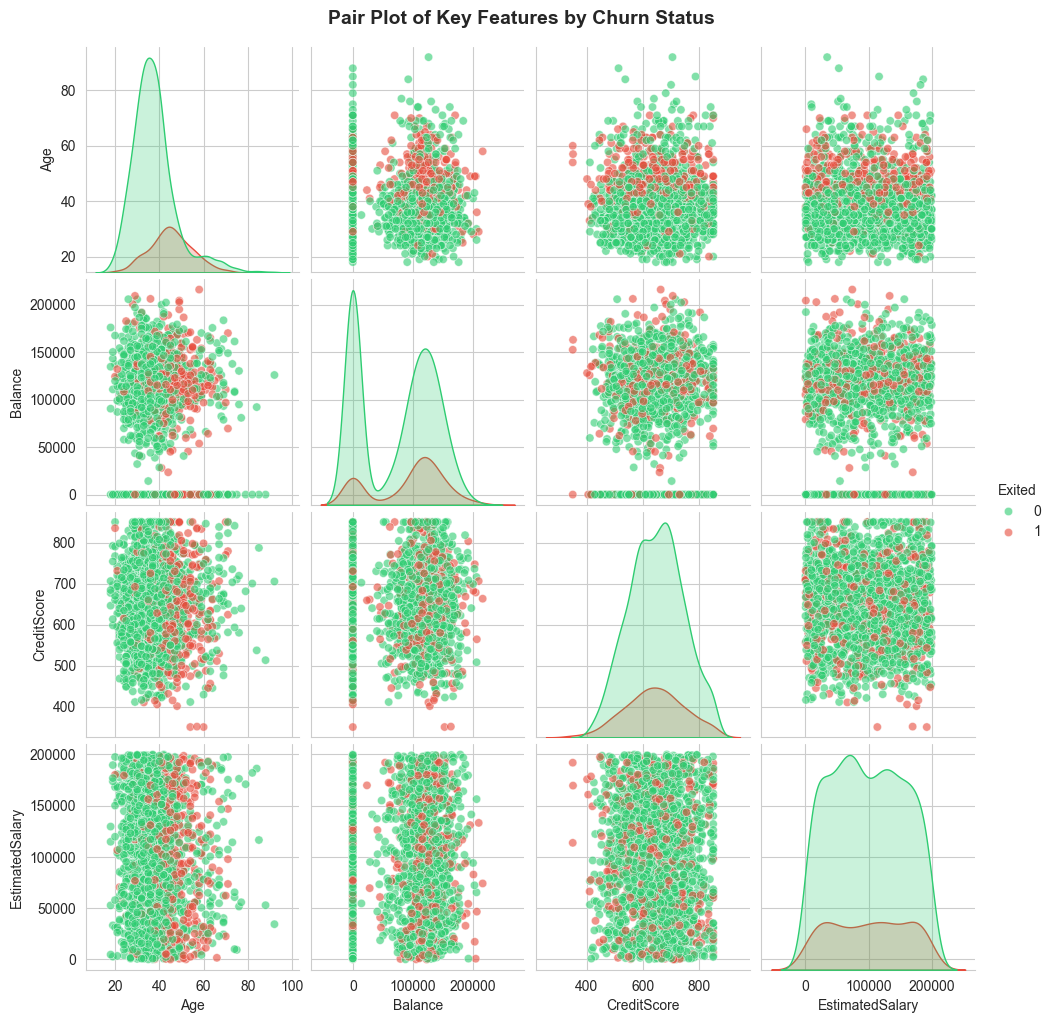

In [49]:
# Pair plot for key numerical features (sample for performance)
sample_df = df.sample(n=min(2000, len(df)), random_state=42)
key_features = ['Age', 'Balance', 'CreditScore', 'EstimatedSalary', 'Exited']

sns.pairplot(sample_df[key_features], hue='Exited', palette={0: '#2ecc71', 1: '#e74c3c'},
             plot_kws={'alpha': 0.6}, diag_kind='kde')
plt.suptitle('Pair Plot of Key Features by Churn Status', y=1.02, fontsize=14, fontweight='bold')
plt.show()

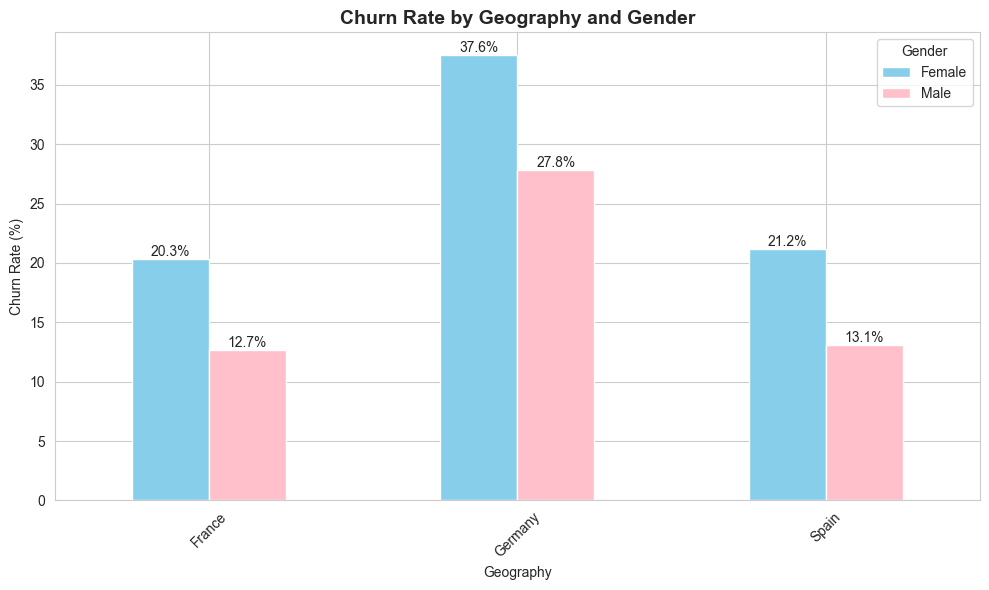


Churn Rate by Geography and Gender:
Gender     Female   Male
Geography               
France      20.34  12.71
Germany     37.55  27.81
Spain       21.21  13.11


In [50]:
# Churn rate by Geography and Gender
grouped = df.groupby(['Geography', 'Gender'])['Exited'].mean() * 100
grouped_df = grouped.unstack()

ax = grouped_df.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'pink'])
plt.title('Churn Rate by Geography and Gender', fontsize=14, fontweight='bold')
plt.xlabel('Geography')
plt.ylabel('Churn Rate (%)')
plt.legend(title='Gender')
plt.xticks(rotation=45)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

plt.tight_layout()
plt.show()

print("\nChurn Rate by Geography and Gender:")
print(grouped_df.round(2))

## 9. Feature Engineering Insights

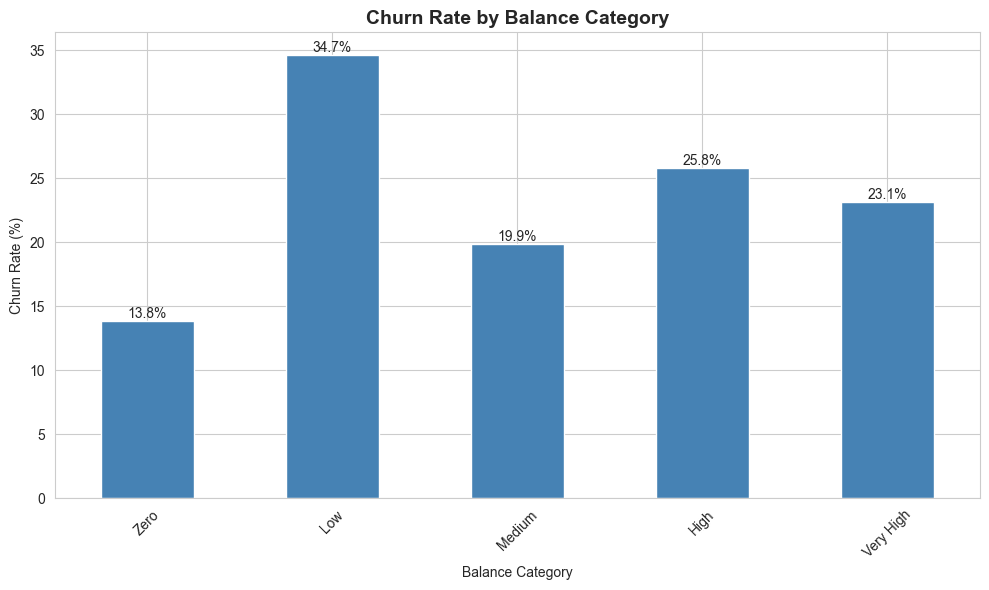

In [51]:
# Create Balance categories
df['BalanceCategory'] = pd.cut(df['Balance'], 
                                bins=[-1, 0, 50000, 100000, 150000, 300000],
                                labels=['Zero', 'Low', 'Medium', 'High', 'Very High'])

# Churn rate by Balance Category
churn_by_balance = df.groupby('BalanceCategory')['Exited'].mean() * 100

fig, ax = plt.subplots(figsize=(10, 6))
churn_by_balance.plot(kind='bar', ax=ax, color='steelblue')
ax.set_title('Churn Rate by Balance Category', fontsize=14, fontweight='bold')
ax.set_xlabel('Balance Category')
ax.set_ylabel('Churn Rate (%)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

for i, v in enumerate(churn_by_balance.values):
    ax.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

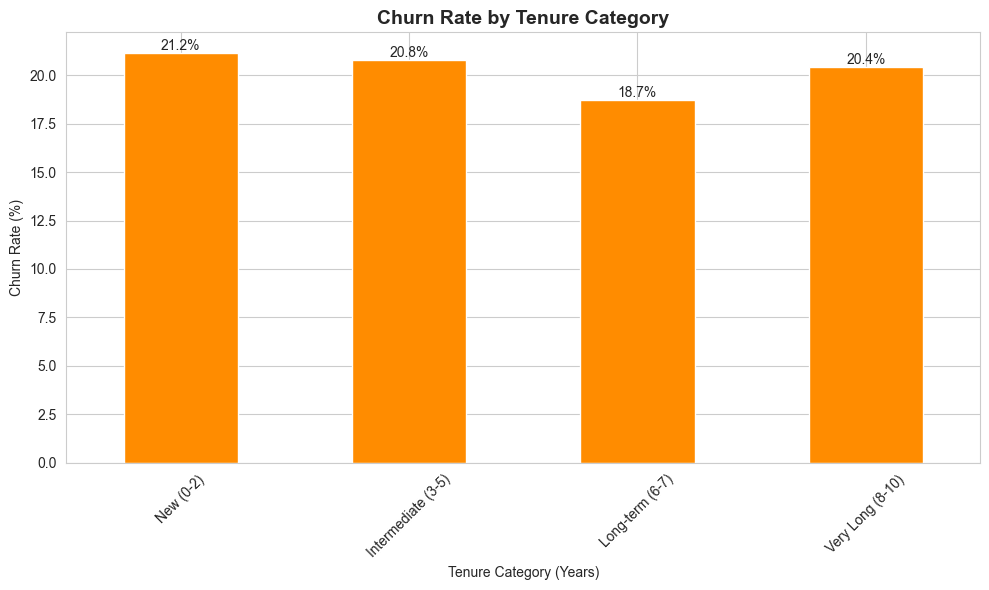

In [52]:
# Create Tenure categories
df['TenureCategory'] = pd.cut(df['Tenure'], 
                               bins=[-1, 2, 5, 7, 10],
                               labels=['New (0-2)', 'Intermediate (3-5)', 'Long-term (6-7)', 'Very Long (8-10)'])

# Churn rate by Tenure Category
churn_by_tenure = df.groupby('TenureCategory')['Exited'].mean() * 100

fig, ax = plt.subplots(figsize=(10, 6))
churn_by_tenure.plot(kind='bar', ax=ax, color='darkorange')
ax.set_title('Churn Rate by Tenure Category', fontsize=14, fontweight='bold')
ax.set_xlabel('Tenure Category (Years)')
ax.set_ylabel('Churn Rate (%)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

for i, v in enumerate(churn_by_tenure.values):
    ax.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 10. Data Quality Checks

In [53]:
# Check for impossible values
print("Data Quality Checks:\n")

# Age checks
print(f"Age range: {df['Age'].min()} to {df['Age'].max()}")
print(f"Negative ages: {(df['Age'] < 0).sum()}")
print(f"Unrealistic ages (>100): {(df['Age'] > 100).sum()}\n")

# Balance checks
print(f"Balance range: ${df['Balance'].min():,.2f} to ${df['Balance'].max():,.2f}")
print(f"Negative balances: {(df['Balance'] < 0).sum()}")
print(f"Zero balances: {(df['Balance'] == 0).sum()}\n")

# Credit Score checks
print(f"Credit Score range: {df['CreditScore'].min()} to {df['CreditScore'].max()}")
print(f"Invalid credit scores (<300 or >850): {((df['CreditScore'] < 300) | (df['CreditScore'] > 850)).sum()}\n")

# Tenure checks
print(f"Tenure range: {df['Tenure'].min()} to {df['Tenure'].max()} years")
print(f"Negative tenure: {(df['Tenure'] < 0).sum()}\n")

# Products checks
print(f"Number of Products range: {df['NumOfProducts'].min()} to {df['NumOfProducts'].max()}")
print(f"Product distribution:\n{df['NumOfProducts'].value_counts().sort_index()}")

Data Quality Checks:

Age range: 18 to 92
Negative ages: 0
Unrealistic ages (>100): 0

Balance range: $0.00 to $250,898.09
Negative balances: 0
Zero balances: 3617

Credit Score range: 350 to 850
Invalid credit scores (<300 or >850): 0

Tenure range: 0 to 10 years
Negative tenure: 0

Number of Products range: 1 to 4
Product distribution:
NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64


In [54]:
# Identify outliers using IQR method
print("Outlier Detection (IQR Method):\n")

for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%)")

Outlier Detection (IQR Method):

CreditScore: 15 outliers (0.15%)
Age: 359 outliers (3.59%)
Tenure: 0 outliers (0.00%)
Balance: 0 outliers (0.00%)
NumOfProducts: 60 outliers (0.60%)
EstimatedSalary: 0 outliers (0.00%)


## 11. Business Insights

In [55]:
# Most common customer profile
print("Most Common Customer Profile:\n")
print(f"Geography: {df['Geography'].mode()[0]}")
print(f"Gender: {df['Gender'].mode()[0]}")
print(f"Average Age: {df['Age'].mean():.1f} years")
print(f"Average Tenure: {df['Tenure'].mean():.1f} years")
print(f"Average Balance: ${df['Balance'].mean():,.2f}")
print(f"Most common # of Products: {df['NumOfProducts'].mode()[0]}")
print(f"Has Credit Card: {(df['HasCrCard'].mean()*100):.1f}%")
print(f"Active Members: {(df['IsActiveMember'].mean()*100):.1f}%")

Most Common Customer Profile:

Geography: France
Gender: Male
Average Age: 38.9 years
Average Tenure: 5.0 years
Average Balance: $76,485.89
Most common # of Products: 1
Has Credit Card: 70.5%
Active Members: 51.5%


In [56]:
# High-risk customer identification
print("High-Risk Customer Characteristics (Higher Churn Rates):\n")

churned_df = df[df['Exited'] == 1]
retained_df = df[df['Exited'] == 0]

print(f"Average Age - Churned: {churned_df['Age'].mean():.1f} vs Retained: {retained_df['Age'].mean():.1f}")
print(f"Average Balance - Churned: ${churned_df['Balance'].mean():,.2f} vs Retained: ${retained_df['Balance'].mean():,.2f}")
print(f"Average Tenure - Churned: {churned_df['Tenure'].mean():.1f} vs Retained: {retained_df['Tenure'].mean():.1f}")
print(f"Average # Products - Churned: {churned_df['NumOfProducts'].mean():.2f} vs Retained: {retained_df['NumOfProducts'].mean():.2f}")
print(f"\nActive Member % - Churned: {(churned_df['IsActiveMember'].mean()*100):.1f}% vs Retained: {(retained_df['IsActiveMember'].mean()*100):.1f}%")

High-Risk Customer Characteristics (Higher Churn Rates):

Average Age - Churned: 44.8 vs Retained: 37.4
Average Balance - Churned: $91,108.54 vs Retained: $72,745.30
Average Tenure - Churned: 4.9 vs Retained: 5.0
Average # Products - Churned: 1.48 vs Retained: 1.54

Active Member % - Churned: 36.1% vs Retained: 55.5%


In [57]:
# Revenue impact analysis
total_churned_balance = churned_df['Balance'].sum()
total_retained_balance = retained_df['Balance'].sum()
avg_churned_balance = churned_df['Balance'].mean()

print("Revenue Impact Analysis:\n")
print(f"Total balance of churned customers: ${total_churned_balance:,.2f}")
print(f"Total balance of retained customers: ${total_retained_balance:,.2f}")
print(f"Average balance per churned customer: ${avg_churned_balance:,.2f}")
print(f"\nNumber of churned customers: {len(churned_df):,}")
print(f"Potential revenue at risk: ${total_churned_balance:,.2f}")

Revenue Impact Analysis:

Total balance of churned customers: $185,588,094.63
Total balance of retained customers: $579,270,798.25
Average balance per churned customer: $91,108.54

Number of churned customers: 2,037
Potential revenue at risk: $185,588,094.63


## 12. Advanced Visualizations

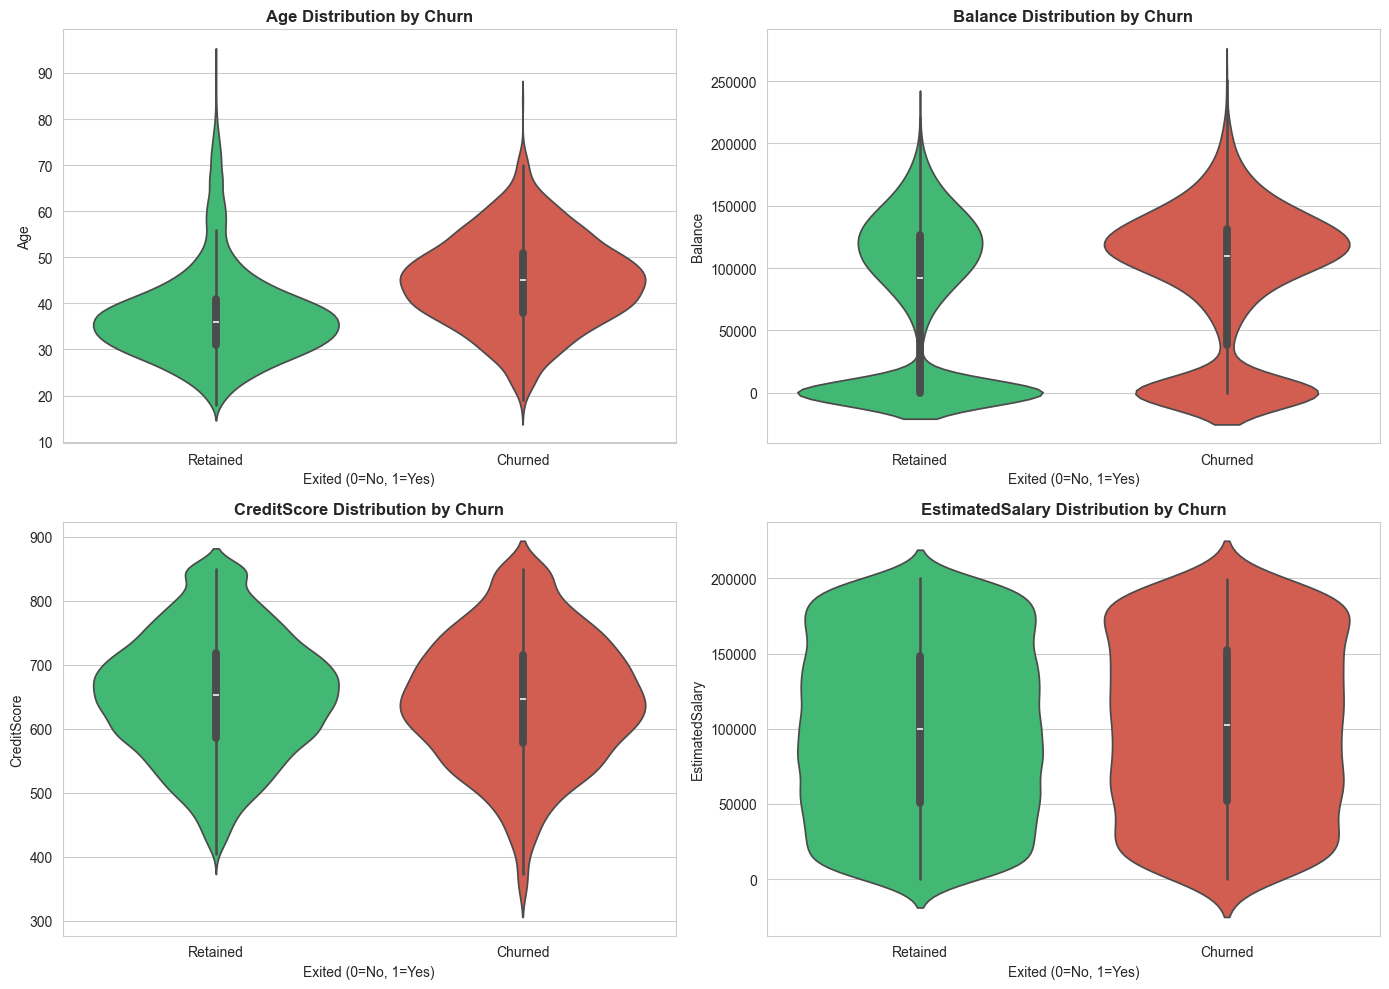

In [61]:
# Violin plots for key features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

key_features_violin = ['Age', 'Balance', 'CreditScore', 'EstimatedSalary']

for idx, col in enumerate(key_features_violin):
    sns.violinplot(data=df, x='Exited', y=col, ax=axes[idx], 
                   palette={'0': '#2ecc71', '1': '#e74c3c'})
    axes[idx].set_title(f'{col} Distribution by Churn', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Exited (0=No, 1=Yes)')
    axes[idx].set_xticklabels(['Retained', 'Churned'])

plt.tight_layout()
plt.show()

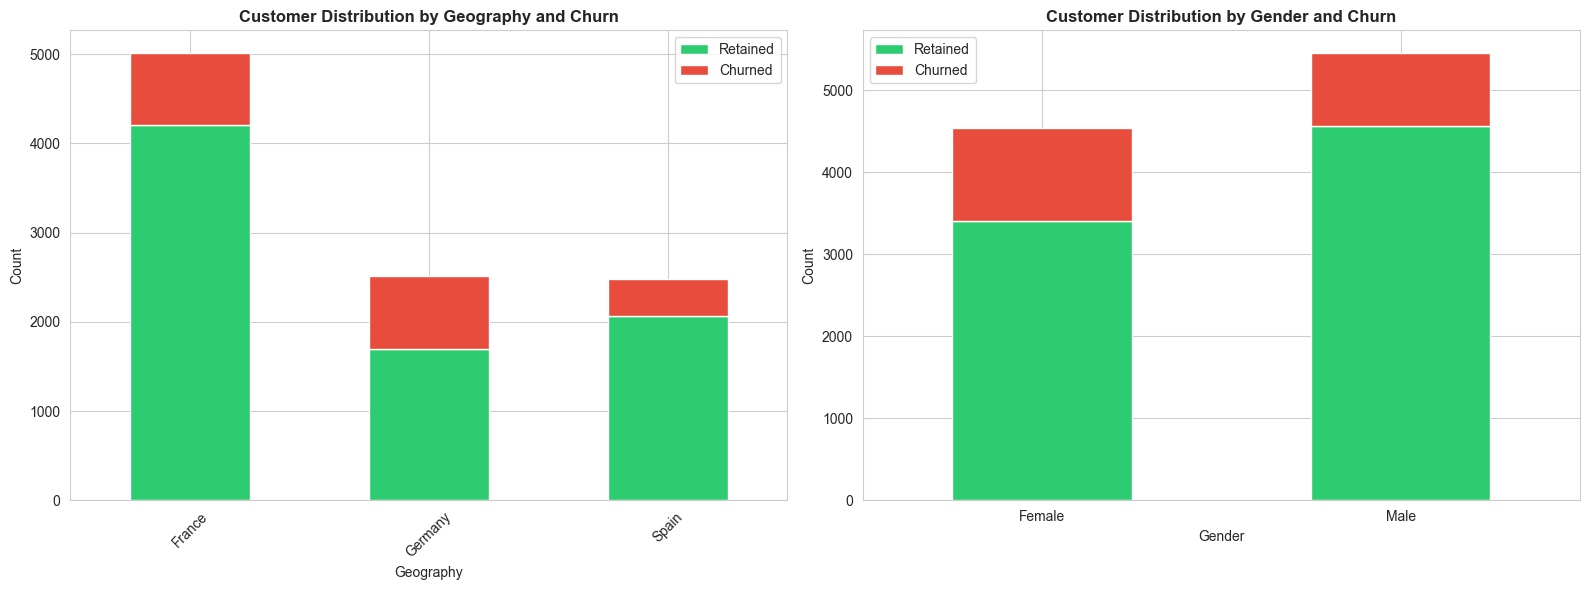

In [59]:
# Stacked bar chart - Geography, Gender, and Churn
stacked_data = df.groupby(['Geography', 'Gender', 'Exited']).size().unstack(fill_value=0)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# By Geography
geo_data = df.groupby(['Geography', 'Exited']).size().unstack(fill_value=0)
geo_data.plot(kind='bar', stacked=True, ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Customer Distribution by Geography and Churn', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Geography')
axes[0].set_ylabel('Count')
axes[0].legend(['Retained', 'Churned'])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# By Gender
gender_data = df.groupby(['Gender', 'Exited']).size().unstack(fill_value=0)
gender_data.plot(kind='bar', stacked=True, ax=axes[1], color=['#2ecc71', '#e74c3c'])
axes[1].set_title('Customer Distribution by Gender and Churn', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')
axes[1].legend(['Retained', 'Churned'])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

## 13. Key Findings Summary

In [60]:
print("="*80)
print("KEY FINDINGS FROM EXPLORATORY DATA ANALYSIS")
print("="*80)

print("\n1. DATASET OVERVIEW:")
print(f"   - Total customers: {len(df):,}")
print(f"   - Overall churn rate: {(df['Exited'].mean()*100):.2f}%")
print(f"   - Features: {df.shape[1]} columns")

print("\n2. CHURN PATTERNS:")
print(f"   - Geography with highest churn: {df.groupby('Geography')['Exited'].mean().idxmax()} ({df.groupby('Geography')['Exited'].mean().max()*100:.1f}%)")
print(f"   - Gender with higher churn: {df.groupby('Gender')['Exited'].mean().idxmax()} ({df.groupby('Gender')['Exited'].mean().max()*100:.1f}%)")
print(f"   - Average age of churned customers: {churned_df['Age'].mean():.1f} years")
print(f"   - Active member churn rate: {df[df['IsActiveMember']==1]['Exited'].mean()*100:.1f}%")
print(f"   - Inactive member churn rate: {df[df['IsActiveMember']==0]['Exited'].mean()*100:.1f}%")

print("\n3. PRODUCT INSIGHTS:")
print(f"   - Most common # of products: {df['NumOfProducts'].mode()[0]}")
print(f"   - Churn rate for customers with 3+ products: {df[df['NumOfProducts']>=3]['Exited'].mean()*100:.1f}%")

print("\n4. FINANCIAL INSIGHTS:")
print(f"   - Average balance (churned): ${churned_df['Balance'].mean():,.2f}")
print(f"   - Average balance (retained): ${retained_df['Balance'].mean():,.2f}")
print(f"   - Total potential revenue at risk: ${total_churned_balance:,.2f}")

print("\n5. DATA QUALITY:")
print(f"   - Missing values: {df.isnull().sum().sum()}")
print(f"   - Duplicate records: {df.duplicated().sum()}")

print("\n" + "="*80)
print("ANALYSIS COMPLETE")
print("="*80)

KEY FINDINGS FROM EXPLORATORY DATA ANALYSIS

1. DATASET OVERVIEW:
   - Total customers: 10,000
   - Overall churn rate: 20.37%
   - Features: 17 columns

2. CHURN PATTERNS:
   - Geography with highest churn: Germany (32.4%)
   - Gender with higher churn: Female (25.1%)
   - Average age of churned customers: 44.8 years
   - Active member churn rate: 14.3%
   - Inactive member churn rate: 26.9%

3. PRODUCT INSIGHTS:
   - Most common # of products: 1
   - Churn rate for customers with 3+ products: 85.9%

4. FINANCIAL INSIGHTS:
   - Average balance (churned): $91,108.54
   - Average balance (retained): $72,745.30
   - Total potential revenue at risk: $185,588,094.63

5. DATA QUALITY:
   - Missing values: 0
   - Duplicate records: 0

ANALYSIS COMPLETE
